In [1]:
# Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve

In [2]:
data_train= pd.read_csv('dataset/data_train.csv')
data_test = pd.read_csv('dataset/data_test.csv')
df_train=data_train.copy()
df_test=data_test.copy()
pd.set_option('display.max_columns',111)
print('train.shape=',df_train.shape)
print('test.shape=',df_test.shape)
df_train.head()
#print(df_test.head())

train.shape= (32561, 15)
test.shape= (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [3]:
#Observe values in each column (unique):
get_column_names = df_train.columns
for i in range(len(get_column_names)):    
    print(f'---Count values unique from column * {df_train.columns[i]} * ---: \n {df_train[df_train.columns[i]].unique()} \n')

---Count values unique from column * age * ---: 
 [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

---Count values unique from column * workclass * ---: 
 [0 1 2 3 4 5 6 7 8] 

---Count values unique from column * fnlwgt * ---: 
 [ 77516  83311 215646 ...  34066  84661 257302] 

---Count values unique from column * education * ---: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] 

---Count values unique from column * education-num * ---: 
 [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

---Count values unique from column * marital-status * ---: 
 [0 1 2 3 4 5 6] 

---Count values unique from column * occupation * ---: 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

---Count values unique from column * relationship * ---: 
 [0 1 2 3 4 5] 

---Count values unique from column * race * ---: 
 [0 1 2 3 4] 

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Co

In [5]:
def plot_Positive_Rate (model, X_test, y_test) :
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs, labels=6)
    lr_auc = roc_auc_score(y_test, lr_probs, labels=6)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('RandomForest: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='RandomForest')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return


In [6]:
# Standardizing the dataset
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

# X and y total: merge "train" and "test" to arise "train" set
df = pd.concat([df_train, df_test],axis=0)
# define X and y for the models:

X=df.drop('income',axis=1)
y=df['income']

X= preprocessing.StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

print ('Train set:', X_train.shape, y_train.shape)
print ('Test set :', X_test.shape, y_test.shape)
print ('Total set :', X.shape, y.shape)

Train set: (39073, 14) (39073,)
Test set : (9769, 14) (9769,)
Total set : (48842, 14) (48842,)


[[6974  498]
 [ 870 1427]]
              precision    recall  f1-score   support

           0      0.889     0.933     0.911      7472
           1      0.741     0.621     0.676      2297

    accuracy                          0.860      9769
   macro avg      0.815     0.777     0.793      9769
weighted avg      0.854     0.860     0.855      9769

cross validation score with roc_auc_ovr scoring= 0.907121785593713
roc_auc_score= 0.9057123375243195
No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.906


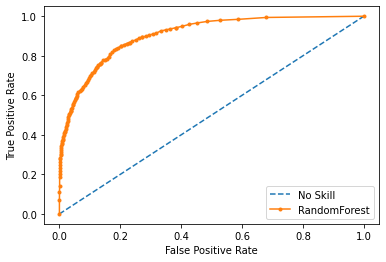

In [8]:
# Random Forest:

# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 42)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring=',accuracy.mean())

# Calculate roc_auc score
print('roc_auc_score=',roc_auc_score(y_test,forest.predict_proba(X_test)[:, 1]))
# plot Positive Rate
plot_Positive_Rate (forest, X_test, y_test)


best_estimator =  RandomForestClassifier(n_estimators=300, random_state=42)
[[6970  502]
 [ 867 1430]]
              precision    recall  f1-score   support

           0      0.889     0.933     0.911      7472
           1      0.740     0.623     0.676      2297

    accuracy                          0.860      9769
   macro avg      0.815     0.778     0.793      9769
weighted avg      0.854     0.860     0.855      9769

cross validation score with roc_auc_ovr scoring= 0.907121785593713
roc_auc_score= 0.9069836342720559
No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.907


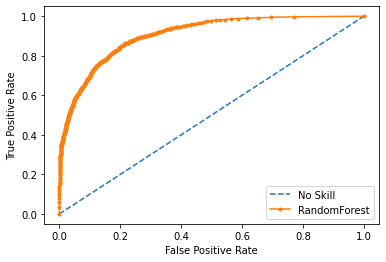

In [11]:
# Random Forest: with GridSearchCV to improve the score

# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 42)

# GridSearchCV
param_grid = {
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2']
}

# with Kfold=15
CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 15)
CV_rfc.fit(X_train, y_train)
print('best_estimator = ',CV_rfc.best_estimator_)
y_pred = CV_rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 10 Kfolds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=15)
print('cross validation score with roc_auc_ovr scoring=',accuracy.mean())

# Calculate roc_auc score
print('roc_auc_score=',roc_auc_score(y_test,CV_rfc.predict_proba(X_test)[:, 1]))
# plot Positive Rate

plot_Positive_Rate (CV_rfc, X_test, y_test)

best_estimator =  RandomForestClassifier(n_estimators=350, random_state=0)
[[6981  491]
 [ 870 1427]]
              precision    recall  f1-score   support

           0      0.889     0.934     0.911      7472
           1      0.744     0.621     0.677      2297

    accuracy                          0.861      9769
   macro avg      0.817     0.778     0.794      9769
weighted avg      0.855     0.861     0.856      9769

cross validation score with roc_auc_ovr scoring= 0.9066856881496449
roc_auc_score= 0.9081432384573865
No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.908


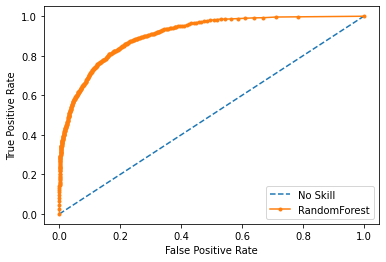

In [12]:
# Random Forest: with GridSearchCV to improve the score

# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)

# GridSearchCV
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_features': ['auto', 'sqrt', 'log2']
}

# with Kfold=20
CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 20)
CV_rfc.fit(X_train, y_train)
print('best_estimator = ',CV_rfc.best_estimator_)
y_pred = CV_rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 20 Kfolds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=20)
print('cross validation score with roc_auc_ovr scoring=',accuracy.mean())

# Calculate roc_auc score
print('roc_auc_score=',roc_auc_score(y_test,CV_rfc.predict_proba(X_test)[:, 1]))
# plot Positive Rate
plot_Positive_Rate (CV_rfc, X_test, y_test)

best_estimator =  RandomForestClassifier(n_estimators=600, random_state=0)
[[6976  496]
 [ 868 1429]]
              precision    recall  f1-score   support

           0      0.889     0.934     0.911      7472
           1      0.742     0.622     0.677      2297

    accuracy                          0.860      9769
   macro avg      0.816     0.778     0.794      9769
weighted avg      0.855     0.860     0.856      9769

cross validation score with roc_auc_ovr scoring= 0.9066856881496449
roc_auc_score= 0.9082424333387092
No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.908


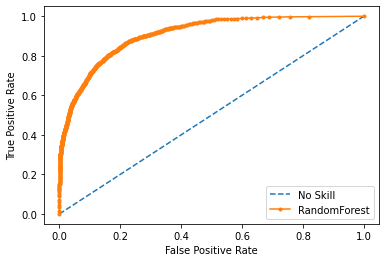

In [13]:
# Random Forest: with GridSearchCV to improve the score

# Train and fit the Random Forest Classification model
forest = RandomForestClassifier(n_estimators=100,random_state = 0)

# GridSearchCV
param_grid = {
    'n_estimators': [500, 550, 600],
    'max_features': ['auto', 'sqrt', 'log2']
}

# with Kfold=20
CV_rfc = GridSearchCV(estimator=forest, param_grid=param_grid, cv= 20)
CV_rfc.fit(X_train, y_train)
print('best_estimator = ',CV_rfc.best_estimator_)
y_pred = CV_rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
# Classification report
print(metrics.classification_report(y_test, y_pred.round(), digits=3))
# Calculate cv score with 'roc_auc_ovr' scoring and 20 Kfolds
accuracy = cross_val_score(forest, X, y,scoring = 'roc_auc_ovr',cv=20)
print('cross validation score with roc_auc_ovr scoring=',accuracy.mean())

# Calculate roc_auc score
print('roc_auc_score=',roc_auc_score(y_test,CV_rfc.predict_proba(X_test)[:, 1]))
# plot Positive Rate
plot_Positive_Rate (CV_rfc, X_test, y_test)